# Cargill Fermentation data analyst hands on test

## General outline

You have been sent a zip file containing 23 CSV files of fermentation data. Each file represents one fermentor or run.
In addition there is an excel file containing the different conditions used in each experiment.
The pH and temperature were the variables under investigation.


A series of outputs needs to be generated from these files.
You are free to paste the outputs into a word/pdf with the code in a separate file but ideally you would submit a Jupyter notebook, R markdown or an equivalent output that combines the code and the outputs. Bonus points if you push everything as a Github repository and share the URL.
Graphical examples of the output are shown for some of the questions.
Axis and legends have usually been omitted but your plots should contain them.

In [1]:
import os
import tarfile
import zipfile

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.style.use('ggplot')
pd.set_option('display.width', 100)
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_colwidth', 500)
warnings.simplefilter("ignore", category=FutureWarning)

# Q1

In [3]:
with zipfile.ZipFile('Data/Raw data.zip', 'r') as zip_file:
    zip_file.extractall(path='Data/')

In [4]:
path = "Data/"

dirs = [x for x in os.listdir(path) if '.csv' in x]

for i, elt in enumerate(dirs):
    if i == 0:
        data = pd.read_csv('Data/{}'.format(elt))
    else:
        new_data = pd.read_csv('Data/{}'.format(elt))
        data = pd.concat([data, new_data], axis=0, ignore_index=True)

In [5]:
data.shape

(14932, 49)

In [6]:
data.head()

Days  Temp          mVVM          pH            pO2           RPM           Scale1        \
0  0.000046        25.918      1001.672         6.833             0       846.652         5.154   
1  0.001435        25.991      1001.696         6.831             0       849.771         5.135   
2  0.002824        26.071      1001.612         6.833             0       845.822         5.156   
3  0.004213        25.947      1001.630         6.832             0       851.784         5.182   
4  0.005602        25.900      1001.687         6.832             0       854.400         5.134   

   Scale2        Scale3        NT            Unused        O2-out        CO2_out       \
0             0             0             0             0          20.9        -0.003   
1             0             0             0             0          20.9        -0.003   
2             0             0             0             0          20.9        -0.003   
3             0             0             0             0          20.9        -0.003   
4             0             0             0             0          20.9        -0.003   

   Cool_heat     Acid_base     ...  Unused      .5  Unused      .6  Unused      .7  \
0        24.991         1.345  ...               0               0               0   
1        21.794         1.378  ...               0               0               0   
2        -9.833         1.344  ...               0               0               0   
3         6.872         1.362  ...               0               0               0   
4        24.951         1.353  ...               0               0               0   

   Unused      .8  Unused      .9  Unused      .10  Unused      .11  Unused      .12  \
0               0               0                0                0                0   
1               0               0                0                0                0   
2               0               0                0                0                0   
3               0               0                0                0                0   
4               0               0                0                0                0   

   Unused      .13  Unused      .14  Unused      .15  Unused      .16  Unused      .17  \
0                0                0                0                0                0   
1                0                0                0                0                0   
2                0                0                0                0                0   
3                0                0                0                0                0   
4                0                0                0                0                0   

   Unused      .18         run  
0                0  KLG-64.745  
1                0  KLG-64.745  
2                0  KLG-64.745  
3                0  KLG-64.745  
4                0  KLG-64.745  

[5 rows x 49 columns]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14932 entries, 0 to 14931
Data columns (total 49 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Days             14932 non-null  float64
 1   Temp             14932 non-null  float64
 2   mVVM             14932 non-null  float64
 3   pH               14932 non-null  float64
 4   pO2              14932 non-null  int64  
 5   RPM              14932 non-null  float64
 6   Scale1           14932 non-null  float64
 7   Scale2           14932 non-null  int64  
 8   Scale3           14932 non-null  int64  
 9   NT               14932 non-null  int64  
 10  Unused           14932 non-null  int64  
 11  O2-out           14929 non-null  float64
 12  CO2_out          14929 non-null  float64
 13  Cool_heat        14932 non-null  float64
 14  Acid_base        14932 non-null  float64
 15  Unused      .1   14932 non-null  int64  
 16  Unused      .2   14932 non-null  int64  
 17  OUR         

In [8]:
data.rename(columns={' run': 'run'}, inplace=True)

In [9]:
data['Hours'] = data['Days']*24

In [10]:
def plot_var(var, df):
    fig = plt.figure(figsize = (12, 8))
    sns.lineplot('Hours', var, hue='run', data=df)
    plt.ylabel('{} (mmol/L/h)'.format(var))
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title ('{} VS time'.format(var))

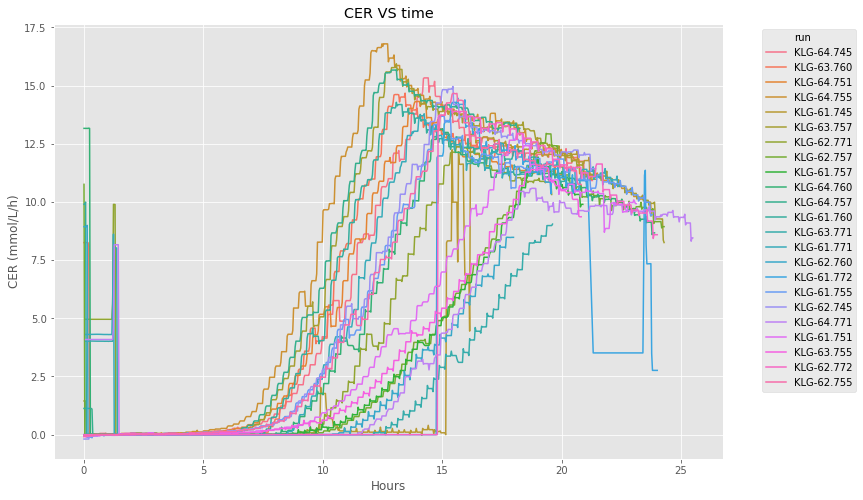

In [11]:
plot_var('CER', data)

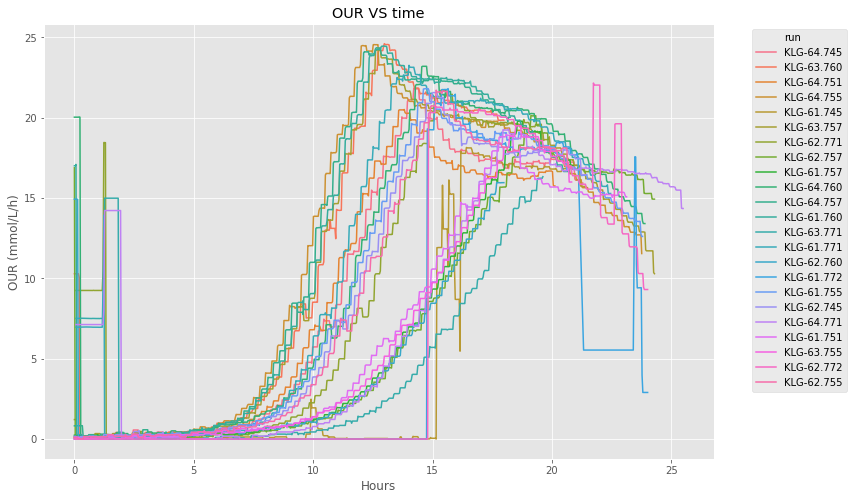

In [12]:
plot_var('OUR', data)

# Q2

In [13]:
data_cleaned = data.loc[data['Hours'] >= 3]
data_cleaned.shape

(12871, 50)

In [14]:
runs = data_cleaned['run'].unique()

# Q3

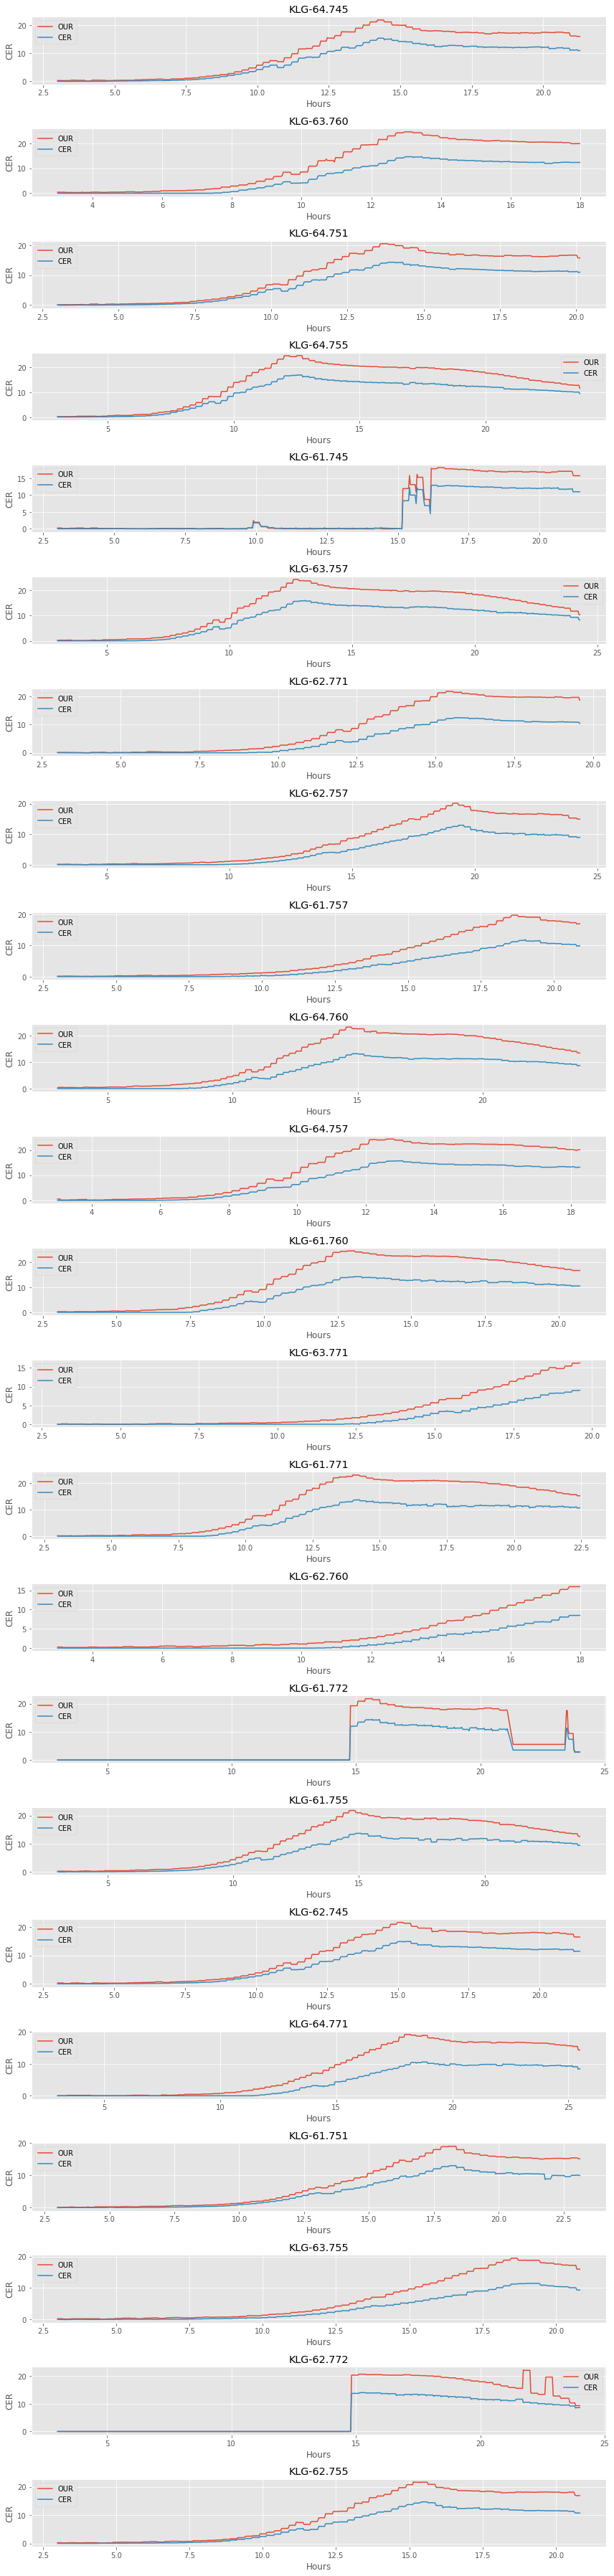

In [18]:
fig = plt.figure(figsize = (12, 50))

for i, elt in enumerate(runs):
    plt.subplot(len(runs), 1, i+1)
    data = data_cleaned.loc[data_cleaned['run'] == runs[i]]
    sns.lineplot('Hours', 'OUR', data=data)
    sns.lineplot('Hours', 'CER', data=data)
    plt.legend(['OUR', 'CER'])
    plt.title('{}'.format(runs[i]))

plt.tight_layout()

__The following experiments show sharp increasings of OUR/CER during the run, likely due to the faulty off-gas equipment (it seems gas are not analyzed before the sharp increasing) :__
- 'KLG-61.745'
- 'KLG-61.772'
- 'KLG-62.772'__

In [19]:
failed_runs = ['KLG-61.745', 'KLG-61.772', 'KLG-62.772']

In [20]:
data_cleaned = data_cleaned.loc[~data_cleaned['run'].isin(failed_runs)]
data_cleaned.shape

(11125, 50)

In [21]:
runs = data_cleaned['run'].unique()
len(runs)

20

# Q4

__The ‘stepped’ or stair like appearance is due to too large sampling steps. Inbetween measurement, the same value is kept.__

# Q5

In [28]:
data_cleaned['OUR smooth'] = data_cleaned.groupby('run')['OUR'].transform(lambda s: s.rolling(7, min_periods=1).mean())
data_cleaned['CER smooth'] = data_cleaned.groupby('run')['CER'].transform(lambda s: s.rolling(7, min_periods=1).mean())

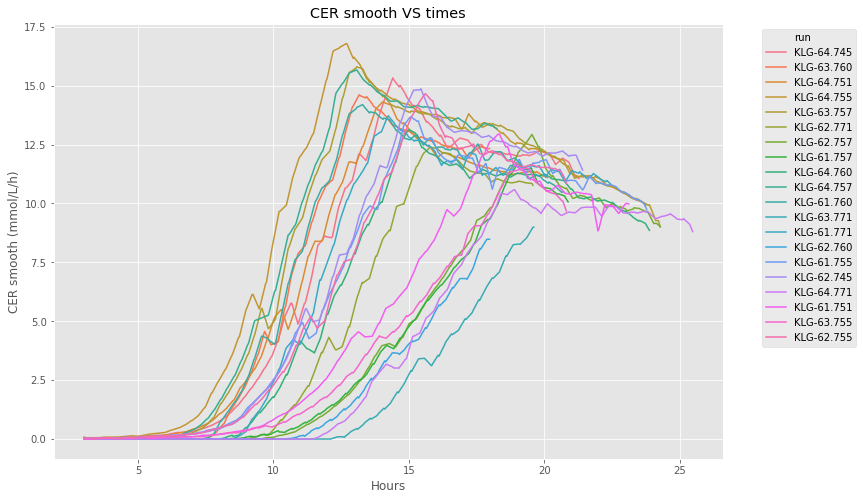

In [29]:
plot_var('CER smooth', data_cleaned)

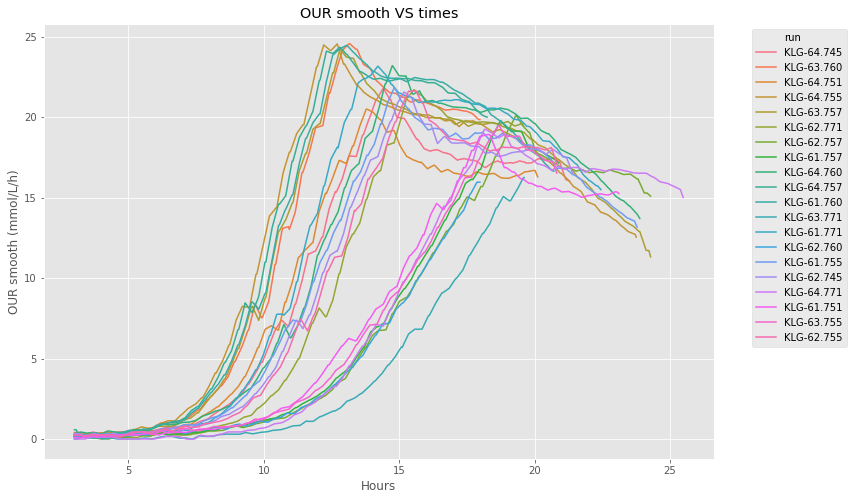

In [30]:
plot_var('OUR smooth', data_cleaned)

# Q6

In [31]:
data_anot = pd.read_excel('Data/Annotation.xlsx')

In [32]:
data_anot.shape

(25, 7)

In [33]:
data_anot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Batch                  25 non-null     int64  
 1   Seed temperature (°C)  25 non-null     int64  
 2   Seed pH                25 non-null     float64
 3   Seed slot              25 non-null     int64  
 4   Seed_id                25 non-null     object 
 5   Unnamed: 5             0 non-null      float64
 6   Unnamed: 6             0 non-null      float64
dtypes: float64(3), int64(3), object(1)
memory usage: 1.5+ KB


In [34]:
data_anot.head()

Batch  Seed temperature (°C)  Seed pH  Seed slot  Seed_id  Unnamed: 5  Unnamed: 6
0    745                     26     6.85         64  F64.745         NaN         NaN
1    745                     26     6.85         62  F62.745         NaN         NaN
2    745                     26     6.85         61  F61.745         NaN         NaN
3    751                     26     6.85         64  F64.751         NaN         NaN
4    751                     24     6.85         61  F61.751         NaN         NaN

In [35]:
data_anot['Seed_id']

0     F64.745
1     F62.745
2     F61.745
3     F64.751
4     F61.751
5     F64.755
6     F63.755
7     F62.755
8     F61.755
9     F64.757
10    F63.757
11    F62.757
12    F61.757
13    F64.760
14    F63.760
15    F62.760
16    F61.760
17    F64.771
18    F63.771
19    F62.771
20    F61.771
21    F64.772
22    F63.772
23    F62.772
24    F61.772
Name: Seed_id, dtype: object

In [36]:
data_cleaned['Seed_id'] = 'F' + data_cleaned['run'].str.split('-').str[-1]

In [37]:
data_merged = data_cleaned.merge(data_anot[['Seed_id', 'Seed temperature (°C)', 'Seed pH']], how='left', on='Seed_id')

In [38]:
data_merged.head()

Days  Temp          mVVM          pH            pO2           RPM           Scale1        \
0  0.125150        26.047      1001.651         6.838             0       843.586         4.988   
1  0.126539        25.955      1000.546         6.839             0       842.631         5.060   
2  0.127928        25.902      1001.687         6.839             0       846.923         5.058   
3  0.129317        26.015      1001.709         6.838             0       853.056         5.012   
4  0.130706        26.026      1000.623         6.836             0       844.176         5.051   

   Scale2        Scale3        NT            Unused        O2-out        CO2_out       \
0             0             0             0             0        20.891         0.001   
1             0             0             0             0        20.891         0.001   
2             0             0             0             0        20.891         0.001   
3             0             0             0             0        20.891         0.001   
4             0             0             0             0        20.891         0.001   

   Cool_heat     Acid_base     ...  Unused      .11  Unused      .12  Unused      .13  \
0         7.498         1.245  ...                0                0                0   
1         4.980         1.225  ...                0                0                0   
2        24.933         1.219  ...                0                0                0   
3        16.862         1.232  ...                0                0                0   
4        -3.162         1.293  ...                0                0                0   

   Unused      .14  Unused      .15  Unused      .16  Unused      .17  Unused      .18  \
0                0                0                0                0                0   
1                0                0                0                0                0   
2                0                0                0                0                0   
3                0                0                0                0                0   
4                0                0                0                0                0   

          run     Hours  OUR smooth  CER smooth  Seed_id  Seed temperature (°C)  Seed pH  
0  KLG-64.745  3.003612    0.298063    0.026822  F64.745                     26     6.85  
1  KLG-64.745  3.036943    0.297899    0.026807  F64.745                     26     6.85  
2  KLG-64.745  3.070279    0.297957    0.026812  F64.745                     26     6.85  
3  KLG-64.745  3.103613    0.297988    0.026815  F64.745                     26     6.85  
4  KLG-64.745  3.136944    0.297942    0.026811  F64.745                     26     6.85  

[5 rows x 55 columns]

In [39]:
data_merged['Seed temperature (°C)'].isna().sum()

0

In [40]:
data_merged['Seed pH'].isna().sum()

0

# Q7

In [41]:
data_groupby = data_merged.groupby('Seed temperature (°C)')['OUR'].agg(['mean', 'median'])

In [42]:
data_groupby

mean     median
Seed temperature (°C)                      
24                      6.635648   3.041339
26                     10.290695  11.719985
28                     12.648076  16.055690

In [50]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_merged, x="Hours", y="OUR smooth", hue='Seed temperature (°C)', palette="flare")
# Q8plt.title('OUR VS time accross seed temperature')

ValueError: Palette {} not understood

<Figure size 864x432 with 0 Axes>

# Q8

In [52]:
data_merged['OUR-CER'] = (data_merged['OUR smooth'] - data_merged['CER smooth'])/data_merged['Hours']

In [53]:
data_merged['OUR-CER'][:10]

0    0.090305
1    0.089265
2    0.088313
3    0.087373
4    0.086432
5    0.085529
6    0.083132
7    0.080781
8    0.078491
9    0.076227
Name: OUR-CER, dtype: float64

(0, 1)

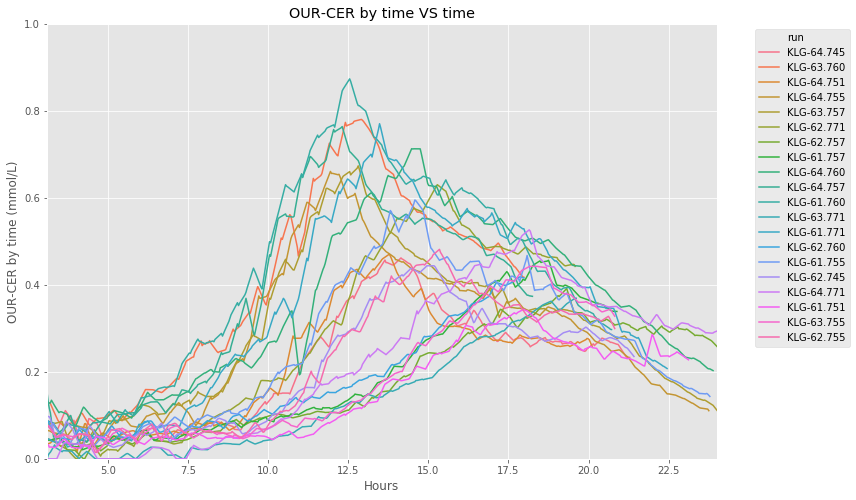

In [54]:
fig = plt.figure(figsize = (12, 8))
sns.lineplot('Hours', 'OUR-CER', hue='run', data=data_merged)
plt.ylabel('OUR-CER by time (mmol/L)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title ('OUR-CER by time VS time')
plt.xlim(3.1, 24)
plt.ylim(0, 1)